# Fake news detection using ML 

#### Problem Statement:
Indian politics suffered from a great set back due to fake news. Fake news is intentionally written to mislead the audience to believe the false propaganda, which makes it difficult to detect based on news content. The fake news has hindered the mindset of the common people. Due to this widespread of the fake news online it is the need of the hour to check the authenticity of the news. The spread of fake news has the potential for extremely negative impact on society. The proposed approach is to use machine learning to detect fake news. Using vectorisation of the news title and then analysing the tokens of words with our dataset. The dataset we are using is a predefined curated list of news with their property of being a fake news or not. Our goal is to develop a model that classifies a given article as either true or fake.

#### Appproach Theoratically:
Fundamental human cognition and behaviour theories if applied in news analysis, they have implied that fake news potentially differs from the truth in terms of, e.g., writing style and quality, quantity such as word counts, and sentiments expressed. It should be noted that these theories, developed by forensic psychology, target deceptive statements or testimonies but not fake news, though these are similar concepts. Thus, one research opportunity is to verify whether these attributes are statistically distinguishable among disinformation, fake news, and the truth, in particular, using big fake news data. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Read Datasets

In [2]:
#Import the dataset
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [4]:
fake.shape, true.shape

((23481, 4), (21417, 4))

In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Data Cleaning and Preparation

In [7]:
# Add coloumn target to track real and fake
fake['target'] = 'fake'
true['target'] = 'true'

In [8]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [9]:
fake.shape, true.shape

((23481, 5), (21417, 5))

In [11]:
#concatenate the two dataframes
data = pd.concat([fake, true]).reset_index(drop=True)
data.shape

(44898, 5)

In [12]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [13]:
data.head()

,title,text,subject,date,target
0,Trump On The Verge Of Meltdown As FBI Clears ...,The FBI had just announced that it was clearin...,News,"November 7, 2016",fake
1,Couple defy Hurricane Maria on roof to save pe...,"YAUCO, Puerto Rico (Reuters) - Hurricane Maria...",worldnews,"September 26, 2017",true
2,Nigerian president says 'cannot afford' to ret...,ABUJA (Reuters) - Nigeria s President Muhammad...,worldnews,"November 7, 2017",true
3,FAKE NEWS! RIGGED NBC/WSJ POLL Claims Trump Hi...,The poll below is why people shouldn t trust p...,politics,"Apr 23, 2017",fake
4,Trump’s Problems With Women Get Worse As Anot...,Donald Trump keeps saying that all the women w...,News,"October 27, 2016",fake


In [14]:
# we dont require date coloum for analysis
data.drop("date", inplace=True, axis=1)
data.head()

,title,text,subject,target
0,Trump On The Verge Of Meltdown As FBI Clears ...,The FBI had just announced that it was clearin...,News,fake
1,Couple defy Hurricane Maria on roof to save pe...,"YAUCO, Puerto Rico (Reuters) - Hurricane Maria...",worldnews,true
2,Nigerian president says 'cannot afford' to ret...,ABUJA (Reuters) - Nigeria s President Muhammad...,worldnews,true
3,FAKE NEWS! RIGGED NBC/WSJ POLL Claims Trump Hi...,The poll below is why people shouldn t trust p...,politics,fake
4,Trump’s Problems With Women Get Worse As Anot...,Donald Trump keeps saying that all the women w...,News,fake


In [15]:
#we will only use text for analysis and not title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,The FBI had just announced that it was clearin...,News,fake
1,"YAUCO, Puerto Rico (Reuters) - Hurricane Maria...",worldnews,true
2,ABUJA (Reuters) - Nigeria s President Muhammad...,worldnews,true
3,The poll below is why people shouldn t trust p...,politics,fake
4,Donald Trump keeps saying that all the women w...,News,fake


In [16]:
#we will convert text to lowercase for uniformity
data['text'] = data['text'].apply(lambda x:x.lower())
data.head()

,text,subject,target
0,the fbi had just announced that it was clearin...,News,fake
1,"yauco, puerto rico (reuters) - hurricane maria...",worldnews,true
2,abuja (reuters) - nigeria s president muhammad...,worldnews,true
3,the poll below is why people shouldn t trust p...,politics,fake
4,donald trump keeps saying that all the women w...,News,fake


In [17]:
# will remove punctuation to ake it simplify for analysis
import string
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

def punctuation_removal(text):
    for x in text:
        if x in punc:
            text = text.replace(x, "")
    return text


In [18]:
data['text'] = data['text'].apply(punctuation_removal)

In [19]:
data.head()

,text,subject,target
0,the fbi had just announced that it was clearin...,News,fake
1,yauco puerto rico reuters hurricane maria bat...,worldnews,true
2,abuja reuters nigeria s president muhammadu b...,worldnews,true
3,the poll below is why people shouldn t trust p...,politics,fake
4,donald trump keeps saying that all the women w...,News,fake


In [20]:
#removing stopwords to avoid use of useless words in analysis
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [21]:
data.head()

,text,subject,target
0,fbi announced clearing democratic nominee hill...,News,fake
1,yauco puerto rico reuters hurricane maria batt...,worldnews,true
2,abuja reuters nigeria president muhammadu buha...,worldnews,true
3,poll people trust polls ever always look sampl...,politics,fake
4,donald trump keeps saying women come forward a...,News,fake


## Data Exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


<Axes: xlabel='subject'>

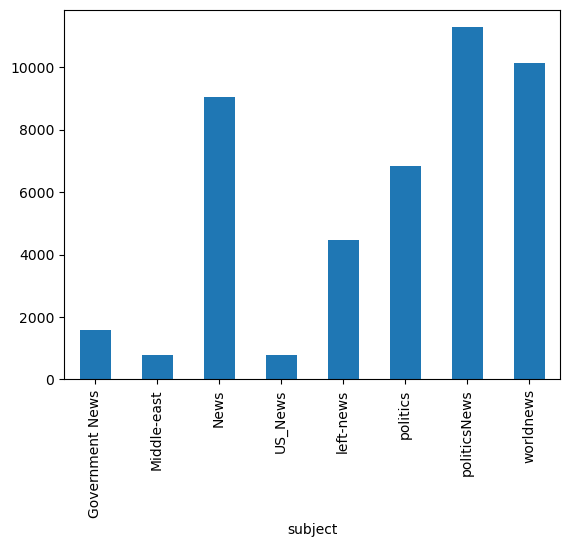

In [27]:
#article per subject
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind='bar')

target
fake    23481
true    21417
Name: text, dtype: int64


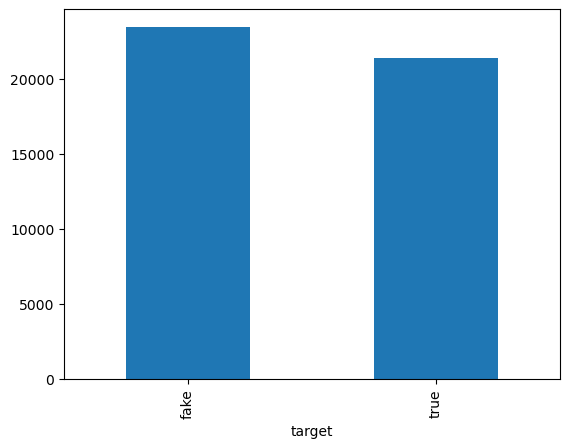

In [28]:
#Count of fake and real news
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

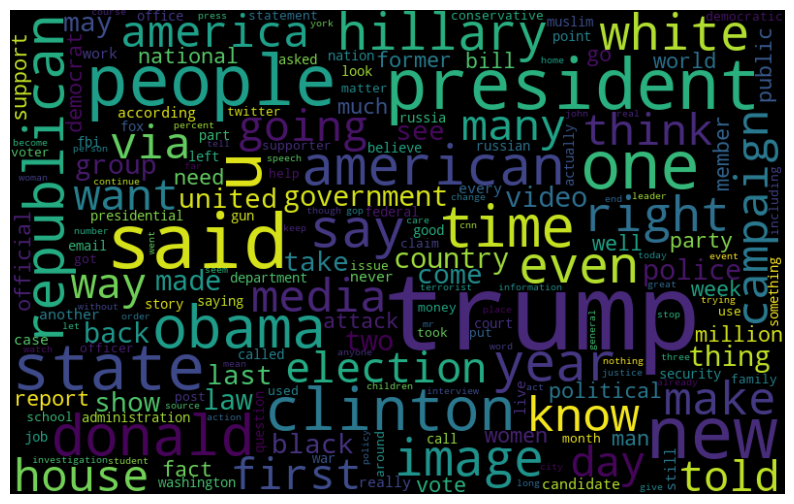

In [33]:
#word cloud for fake news
from wordcloud import WordCloud
fake_data = data[data['target']=='fake']
all_words = ' '.join([text for text in fake_data.text])

WordCloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

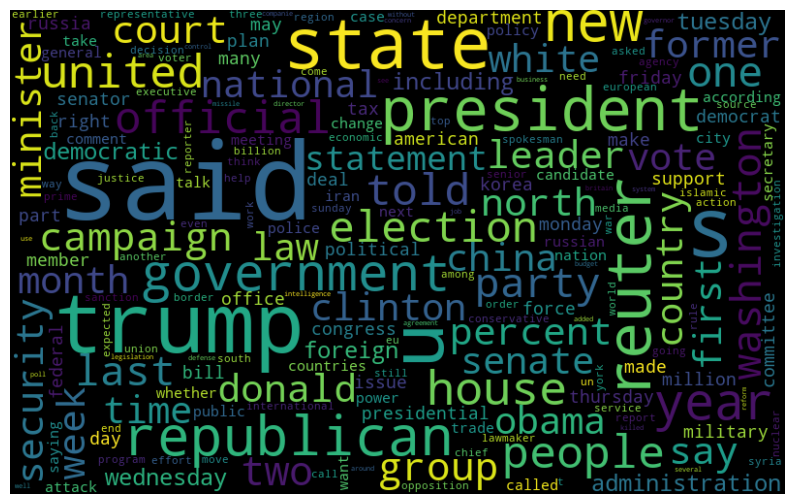

In [34]:
#word cloud for Real articles
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
# Most frequent words counter

from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

In [37]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", UserWarning)

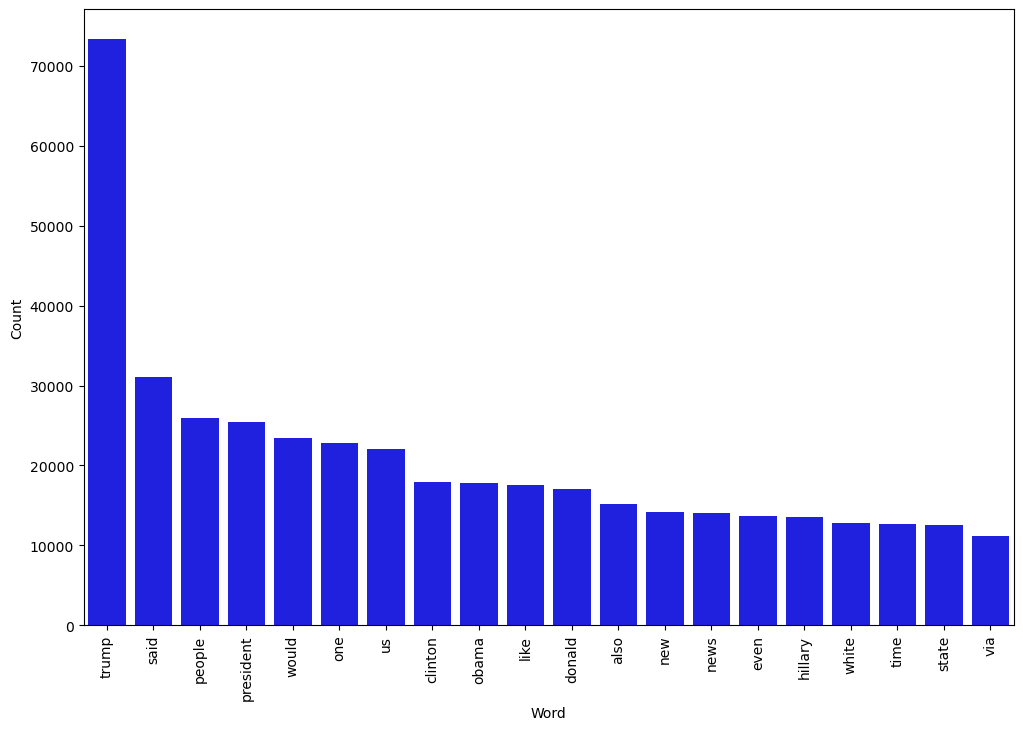

In [38]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

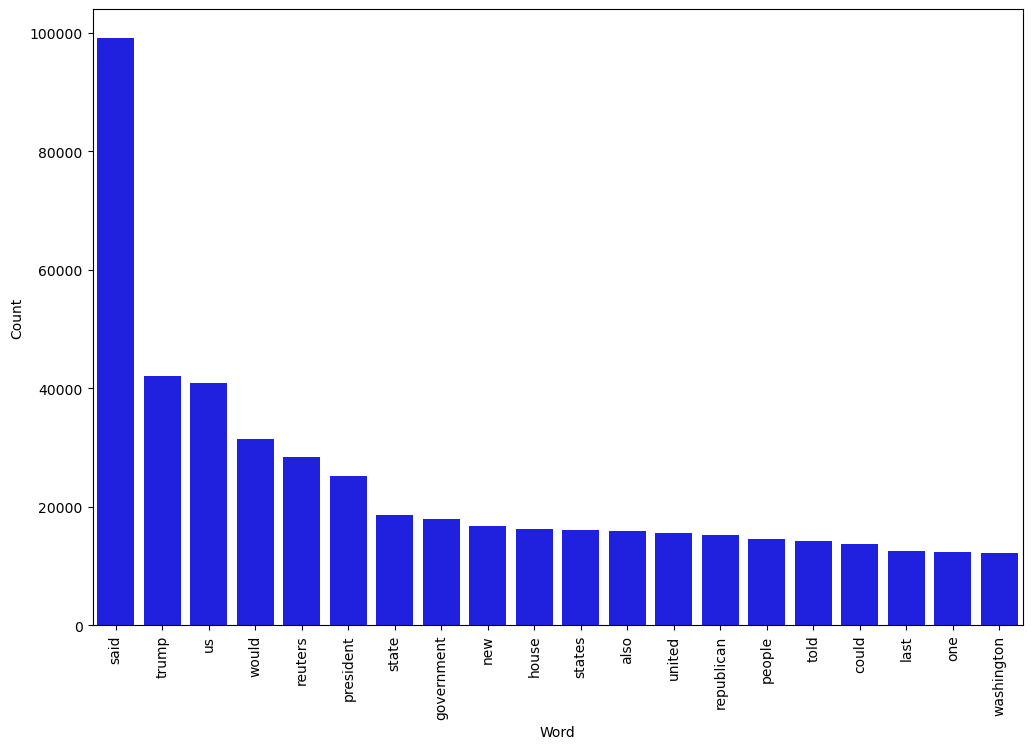

In [39]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

## Model Building

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [41]:
# Function to plot the confusion matrix 
# (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [42]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

## Naive Bayes

In [43]:
from sklearn.naive_bayes import MultinomialNB

dct = dict()

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 94.97%


Confusion matrix, without normalization


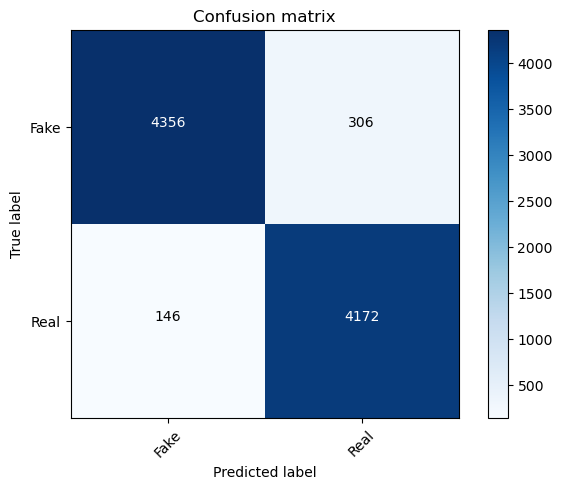

In [44]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('model', LogisticRegression())])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.79%


Confusion matrix, without normalization


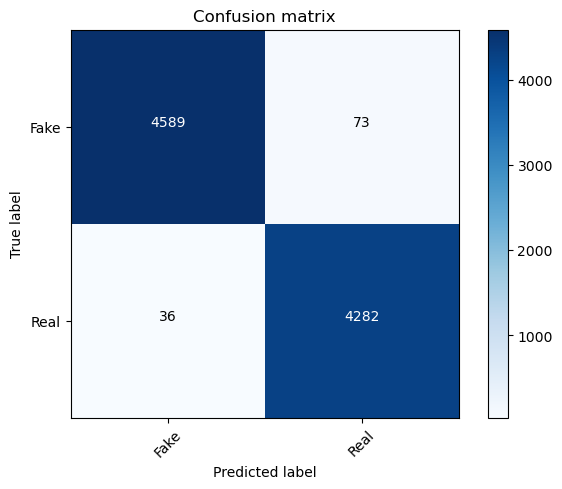

In [47]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.6%


Confusion matrix, without normalization


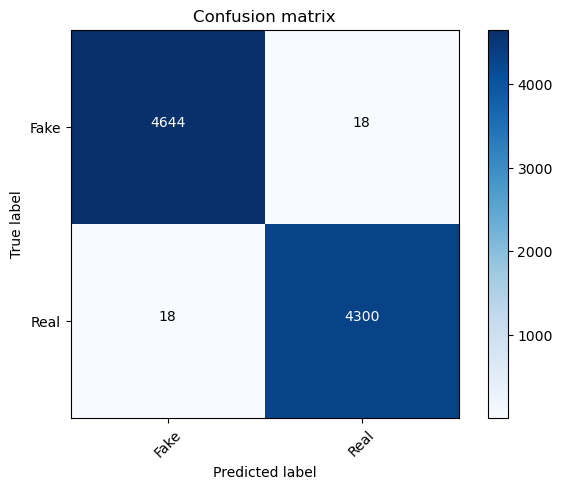

In [49]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion='entropy'))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

Accuracy: 98.98%


Confusion matrix, without normalization


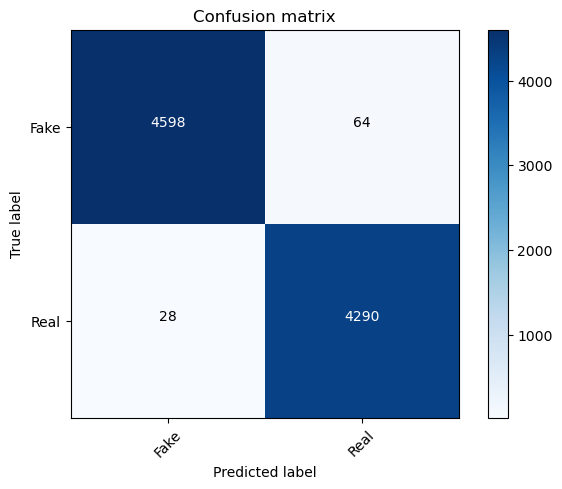

In [51]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## SVM

In [53]:
from sklearn import svm

clf = svm.SVC(kernel='linear')

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train,y_train)
prediction = model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test,prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

Accuracy: 99.42%


Confusion matrix, without normalization


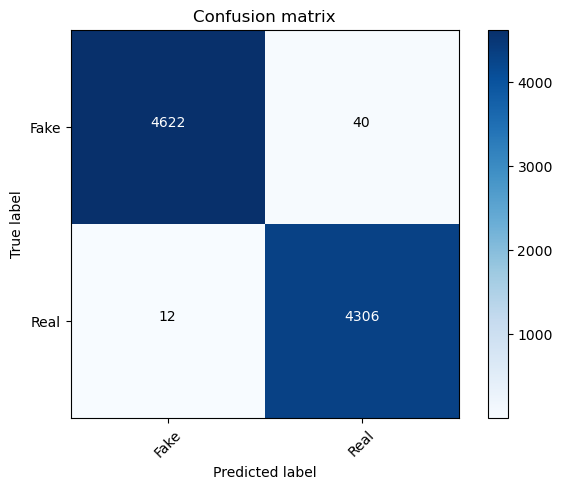

In [54]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Comparing Diffrent Models

([<matplotlib.axis.YTick at 0x28802cb68d0>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

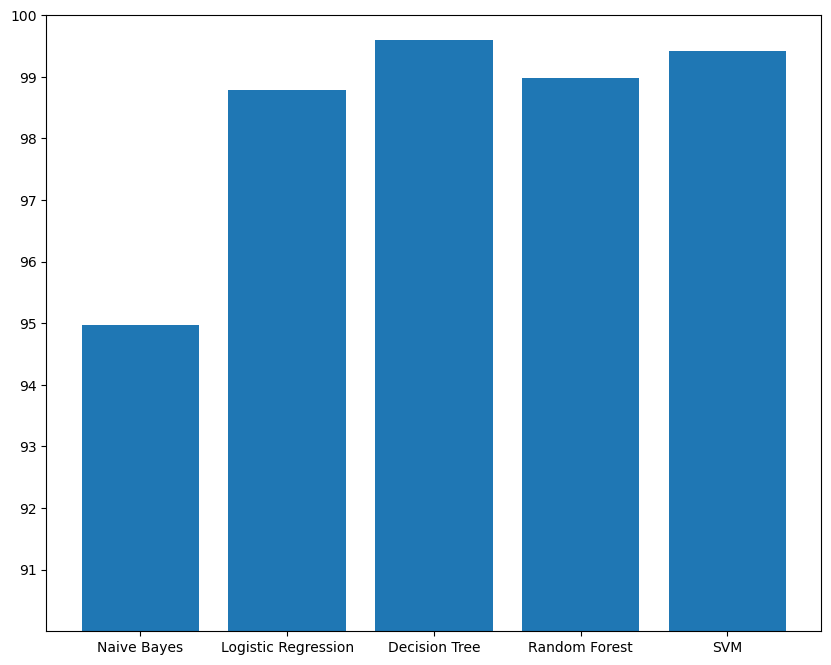

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))